In [1]:
import numpy as np
import pandas as pd 

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('Cleaned.csv')

# Preprocessed Dataset but just Checking

In [3]:
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,0.099863,1,0.0,0,0.362291,0,-0.907145,0,0.257088,1
1,Brazil,Presidente Dutra,-0.549414,0,0.0,0,-2.308886,0,-0.335208,0,-0.276537,0
2,Italy,Priolo Gargallo,1.073778,1,0.0,0,0.620792,0,0.236729,0,1.057527,1
3,Poland,Przasnysz,-1.003907,0,0.0,0,0.189957,0,-0.907145,0,-1.397151,0
4,Germany,Puttlingen,0.814067,1,0.0,0,0.276124,0,0.808665,0,0.844077,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12737,Slovakia,Martin,1.398416,1,0.0,0,0.620792,0,-0.335208,0,1.324340,1
12738,France,Sceaux,0.034935,0,0.0,0,-1.016381,0,1.952539,0,0.203726,0
12739,India,Mormugao,0.034935,0,0.0,0,-0.844047,0,-0.335208,0,0.203726,0
12740,United States of America,Westerville,1.398416,1,0.0,0,1.051627,0,0.236729,0,1.324340,1


In [4]:
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns" )

The dataset contains 12742 rows and 12 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12742 entries, 0 to 12741
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             12505 non-null  object 
 1   City                12741 non-null  object 
 2   AQI Value           12742 non-null  float64
 3   AQI Category        12742 non-null  int64  
 4   CO AQI Value        12742 non-null  float64
 5   CO AQI Category     12742 non-null  int64  
 6   Ozone AQI Value     12742 non-null  float64
 7   Ozone AQI Category  12742 non-null  int64  
 8   NO2 AQI Value       12742 non-null  float64
 9   NO2 AQI Category    12742 non-null  int64  
 10  PM2.5 AQI Value     12742 non-null  float64
 11  PM2.5 AQI Category  12742 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 1.2+ MB


In [6]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,0.099863,1,0.0,0,0.362291,0,-0.907145,0,0.257088,1
1,Brazil,Presidente Dutra,-0.549414,0,0.0,0,-2.308886,0,-0.335208,0,-0.276537,0
2,Italy,Priolo Gargallo,1.073778,1,0.0,0,0.620792,0,0.236729,0,1.057527,1
3,Poland,Przasnysz,-1.003907,0,0.0,0,0.189957,0,-0.907145,0,-1.397151,0
4,Germany,Puttlingen,0.814067,1,0.0,0,0.276124,0,0.808665,0,0.844077,1


In [7]:
data.tail(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12732,Colombia,Viterbo,0.359573,1,0.0,0,-0.671713,0,-0.907145,0,0.470539,1
12733,United States of America,El Reno,-0.679269,0,0.0,0,0.620792,0,-0.335208,0,-0.596713,0
12734,Sri Lanka,Wattala,1.463343,1,0.0,0,-0.671713,0,-0.335208,0,1.377702,1
12735,United Kingdom of Great Britain and Northern I...,Urmston,-1.068835,0,0.0,0,-0.154711,0,0.808665,0,-0.703438,0
12736,United States of America,Highland Springs,0.294646,1,0.0,0,0.189957,0,1.952539,0,0.417176,1
12737,Slovakia,Martin,1.398416,1,0.0,0,0.620792,0,-0.335208,0,1.324340,1
12738,France,Sceaux,0.034935,0,0.0,0,-1.016381,0,1.952539,0,0.203726,0
12739,India,Mormugao,0.034935,0,0.0,0,-0.844047,0,-0.335208,0,0.203726,0
12740,United States of America,Westerville,1.398416,1,0.0,0,1.051627,0,0.236729,0,1.324340,1
12741,Malaysia,Marang,1.333488,1,0.0,0,0.534625,0,-0.907145,0,1.270977,1


In [8]:
data.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
12737,Slovakia,Martin,1.398416,1,0.0,0,0.620792,0,-0.335208,0,1.324340,1
12738,France,Sceaux,0.034935,0,0.0,0,-1.016381,0,1.952539,0,0.203726,0
12739,India,Mormugao,0.034935,0,0.0,0,-0.844047,0,-0.335208,0,0.203726,0
12740,United States of America,Westerville,1.398416,1,0.0,0,1.051627,0,0.236729,0,1.324340,1
12741,Malaysia,Marang,1.333488,1,0.0,0,0.534625,0,-0.907145,0,1.270977,1


In [9]:
data.size


152904

In [10]:
data.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [11]:
data.duplicated().sum()

0

In [12]:
data.nunique()

Country                 151
City                  12741
AQI Value                92
AQI Category              3
CO AQI Value              1
CO AQI Category           1
Ozone AQI Value          65
Ozone AQI Category        2
NO2 AQI Value             8
NO2 AQI Category          1
PM2.5 AQI Value          99
PM2.5 AQI Category        3
dtype: int64

In [13]:
data.isnull().sum()


Country               237
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [14]:
len(data.columns)

12

In [15]:
data.shape

(12742, 12)

# Descriptive statistics:

In [16]:
data.describe()

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
count,1.274200e+04,12742.000000,12742.0,12742.0,1.274200e+04,12742.000000,1.274200e+04,12742.0,1.274200e+04,12742.000000
mean,-2.471732e-16,0.442238,0.0,0.0,-4.949911e-17,0.037749,-2.960014e-16,0.0,3.943548e-17,0.430702
std,1.000039e+00,0.499194,0.0,0.0,1.000039e+00,0.190597,1.000039e+00,0.0,1.000039e+00,0.497723
min,-2.756954e+00,0.000000,0.0,0.0,-2.739722e+00,0.000000,-9.071451e-01,0.0,-2.357677e+00,0.000000
25%,-7.441966e-01,0.000000,0.0,0.0,-6.717132e-01,0.000000,-9.071451e-01,0.0,-7.568003e-01,0.000000
50%,-9.492013e-02,0.000000,0.0,0.0,1.762292e-02,0.000000,-3.352083e-01,0.0,4.363820e-02,0.000000
75%,6.192840e-01,1.000000,0.0,0.0,7.069590e-01,0.000000,8.086653e-01,0.0,6.839890e-01,1.000000
max,3.281318e+00,2.000000,0.0,0.0,2.774967e+00,1.000000,3.096412e+00,0.0,2.871854e+00,2.000000


In [17]:
Descriptive_statistics = data.describe()
print(Descriptive_statistics)

          AQI Value  AQI Category  CO AQI Value  CO AQI Category  \
count  1.274200e+04  12742.000000       12742.0          12742.0   
mean  -2.471732e-16      0.442238           0.0              0.0   
std    1.000039e+00      0.499194           0.0              0.0   
min   -2.756954e+00      0.000000           0.0              0.0   
25%   -7.441966e-01      0.000000           0.0              0.0   
50%   -9.492013e-02      0.000000           0.0              0.0   
75%    6.192840e-01      1.000000           0.0              0.0   
max    3.281318e+00      2.000000           0.0              0.0   

       Ozone AQI Value  Ozone AQI Category  NO2 AQI Value  NO2 AQI Category  \
count     1.274200e+04        12742.000000   1.274200e+04           12742.0   
mean     -4.949911e-17            0.037749  -2.960014e-16               0.0   
std       1.000039e+00            0.190597   1.000039e+00               0.0   
min      -2.739722e+00            0.000000  -9.071451e-01              

# Distribution analysis: Histograms.

In [18]:
numeric_cols = data.select_dtypes(include=[int, float]).columns

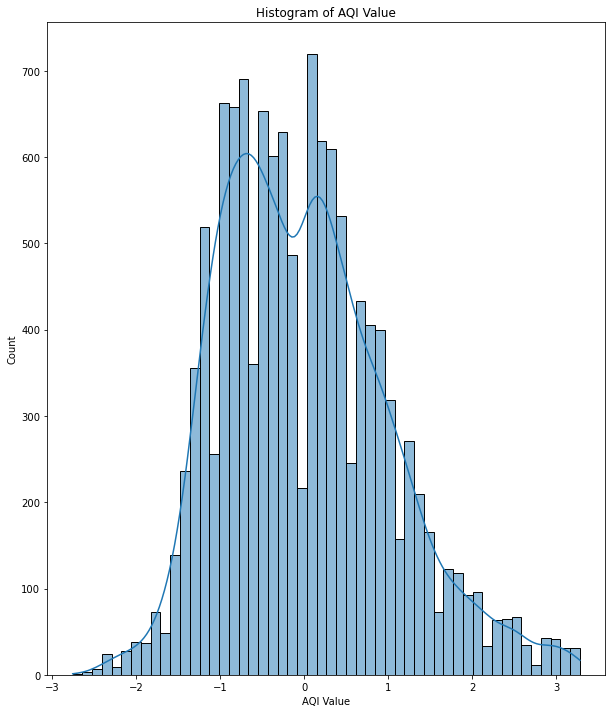

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


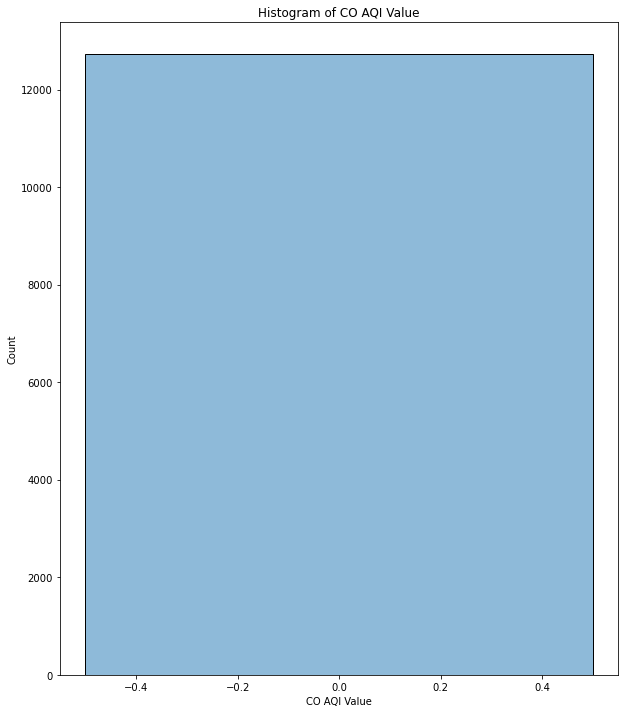

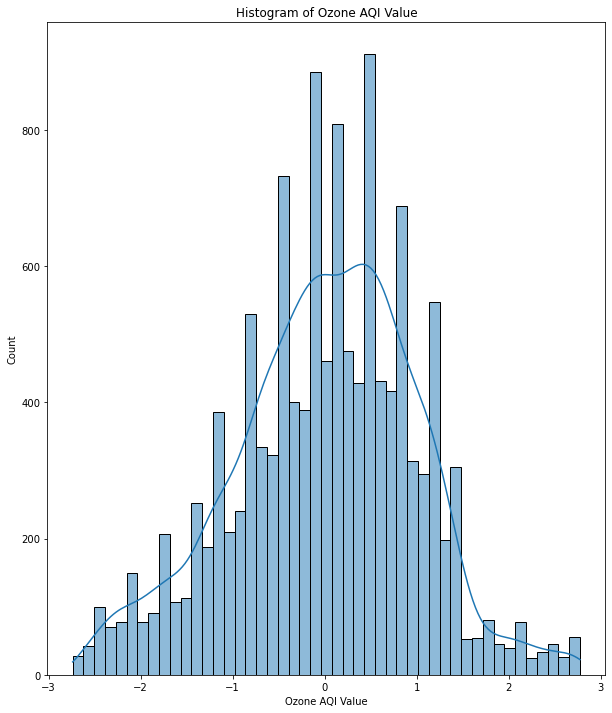

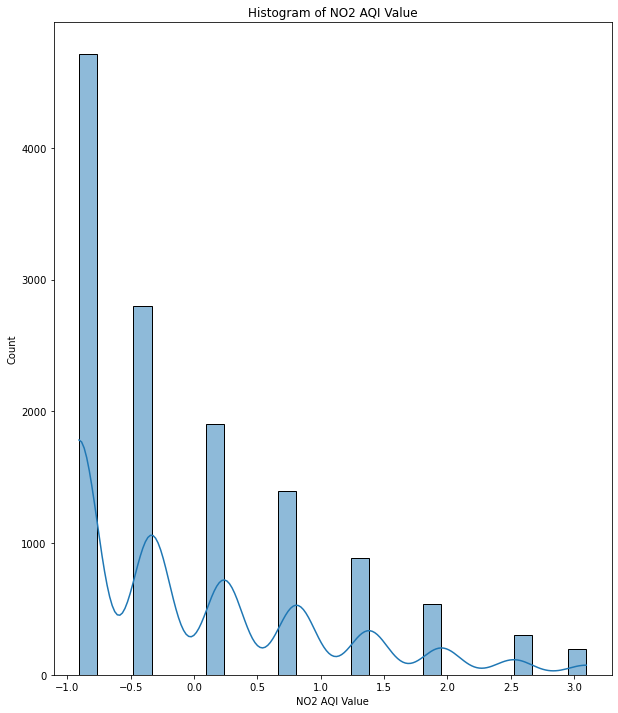

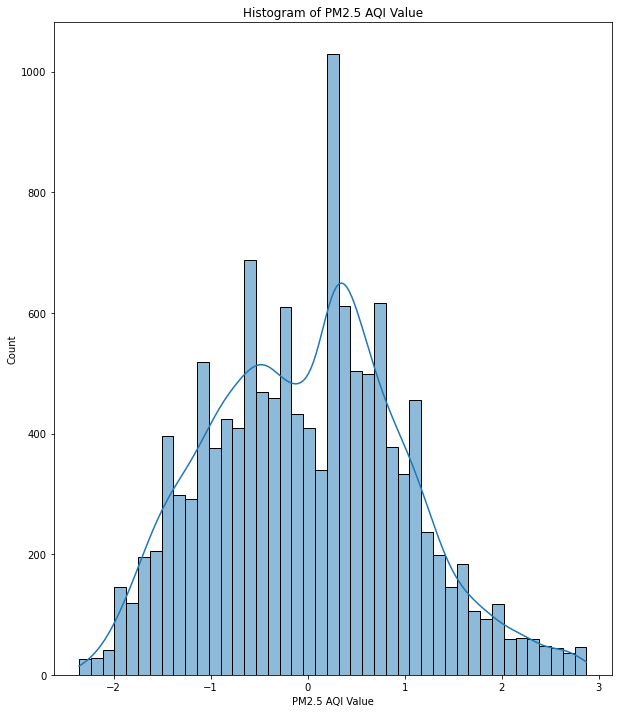

In [19]:
#histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 12))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Distribution analysis: Box plots.

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


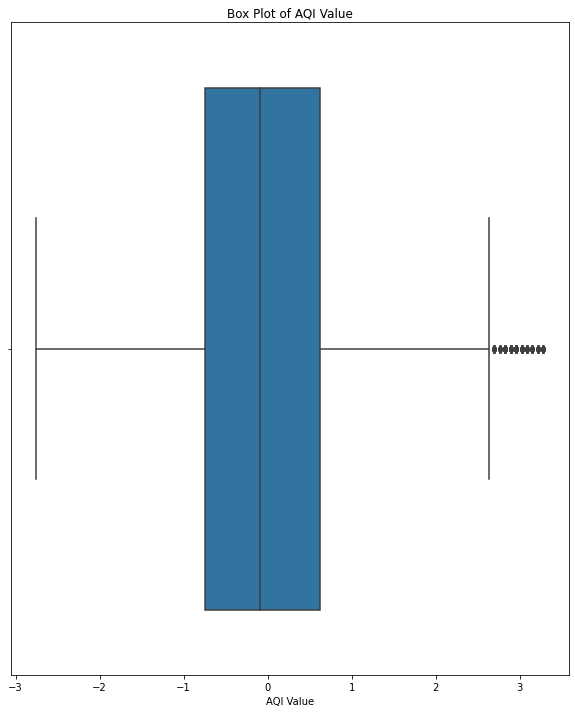

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


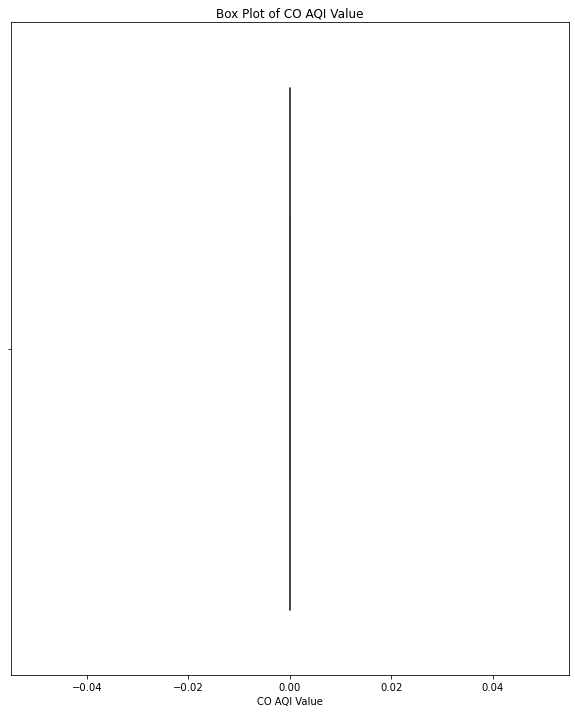

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


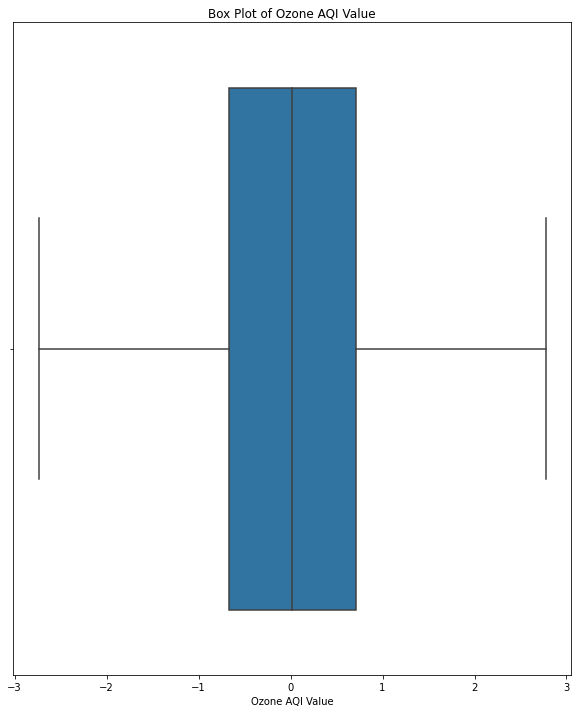

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


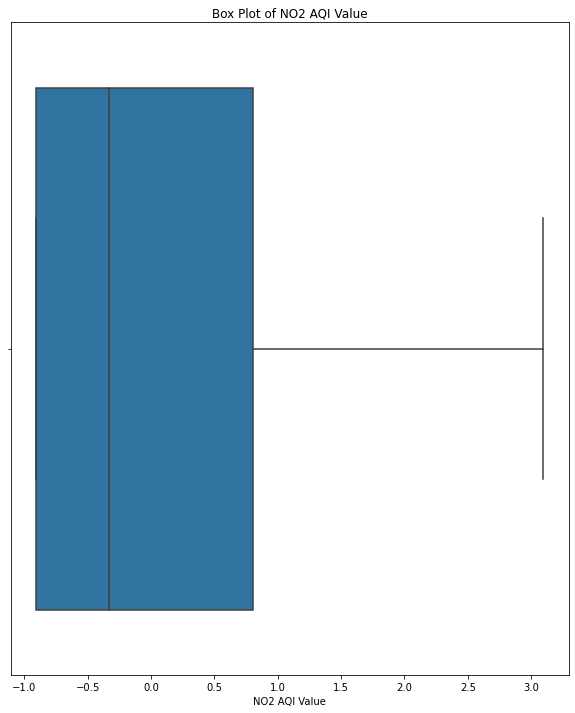

C:\Users\Talha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


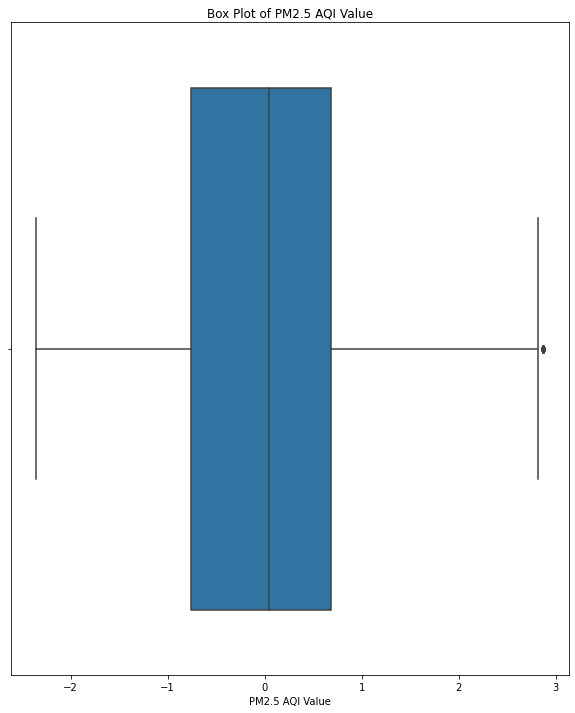

In [20]:
#box plot
for col in numeric_cols:
    plt.figure(figsize=(10, 12))
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# If we talk about country then count plot for just country.

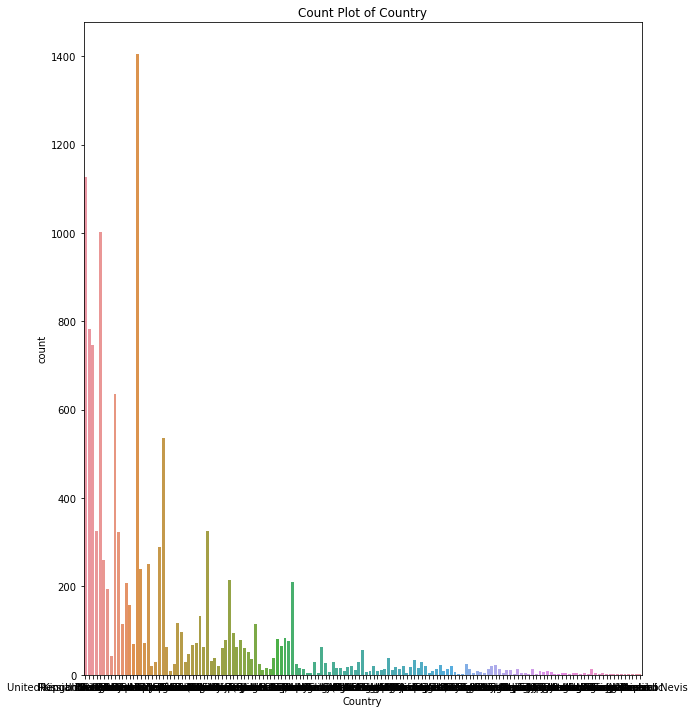

In [21]:
#count plot
plt.figure(figsize=(10, 12))
sns.countplot(x='Country', data=data)
plt.title('Count Plot of Country')
plt.show()

# Correlation analysis: Heatmaps to identify relationships between variables.

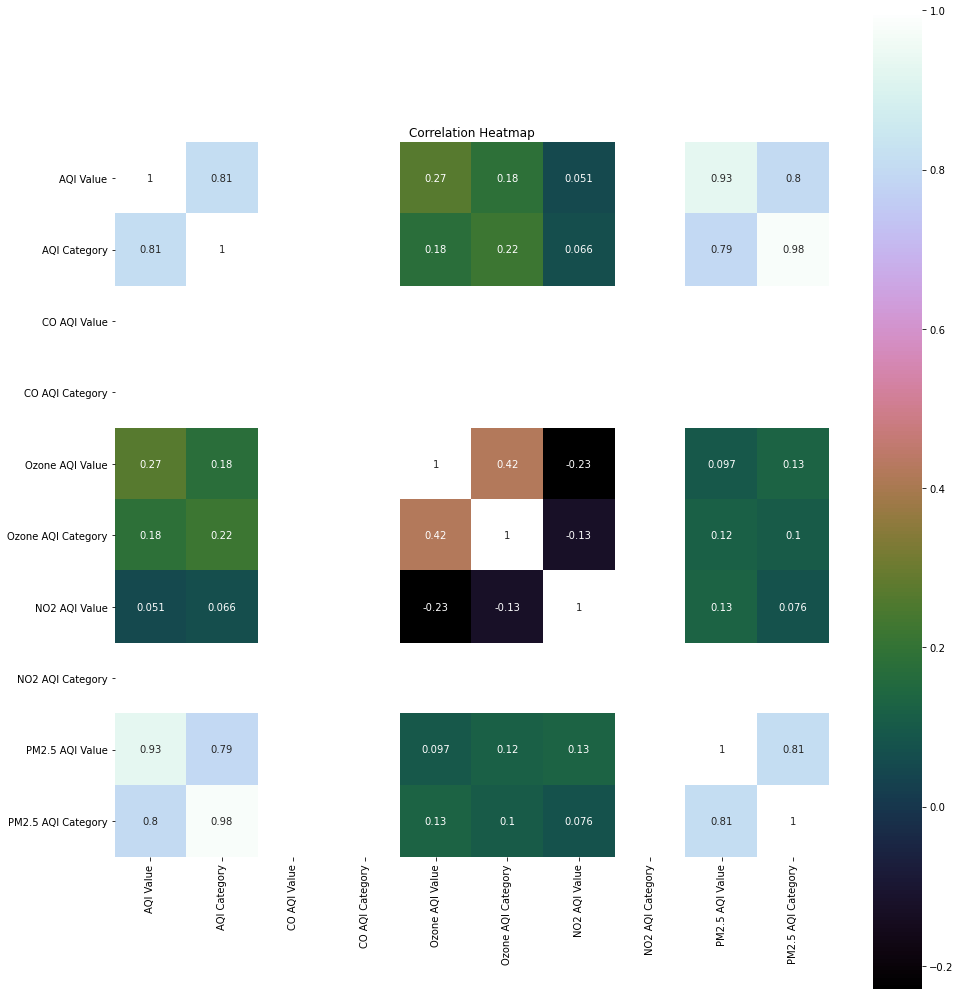

In [22]:
corr_matrix = data.corr()
#heatmap
plt.figure(figsize=(16, 18))
sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Show trends over time

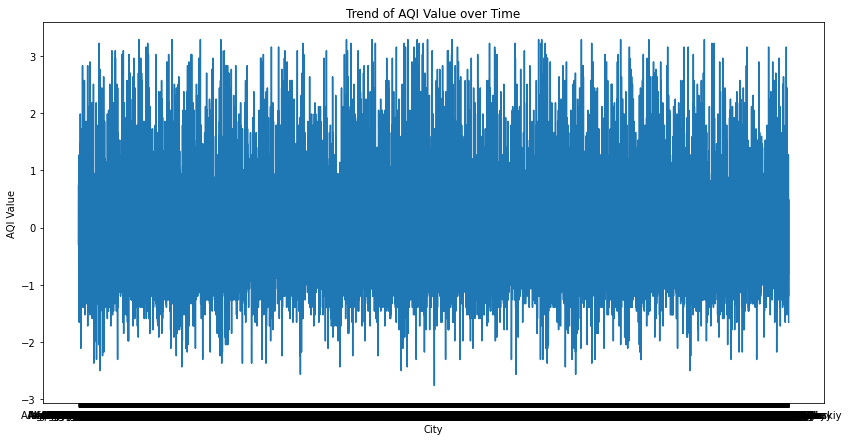

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(data.groupby('City')['AQI Value'].mean().index, data.groupby('City')['AQI Value'].mean().values)
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.title('Trend of AQI Value over Time')
plt.show()

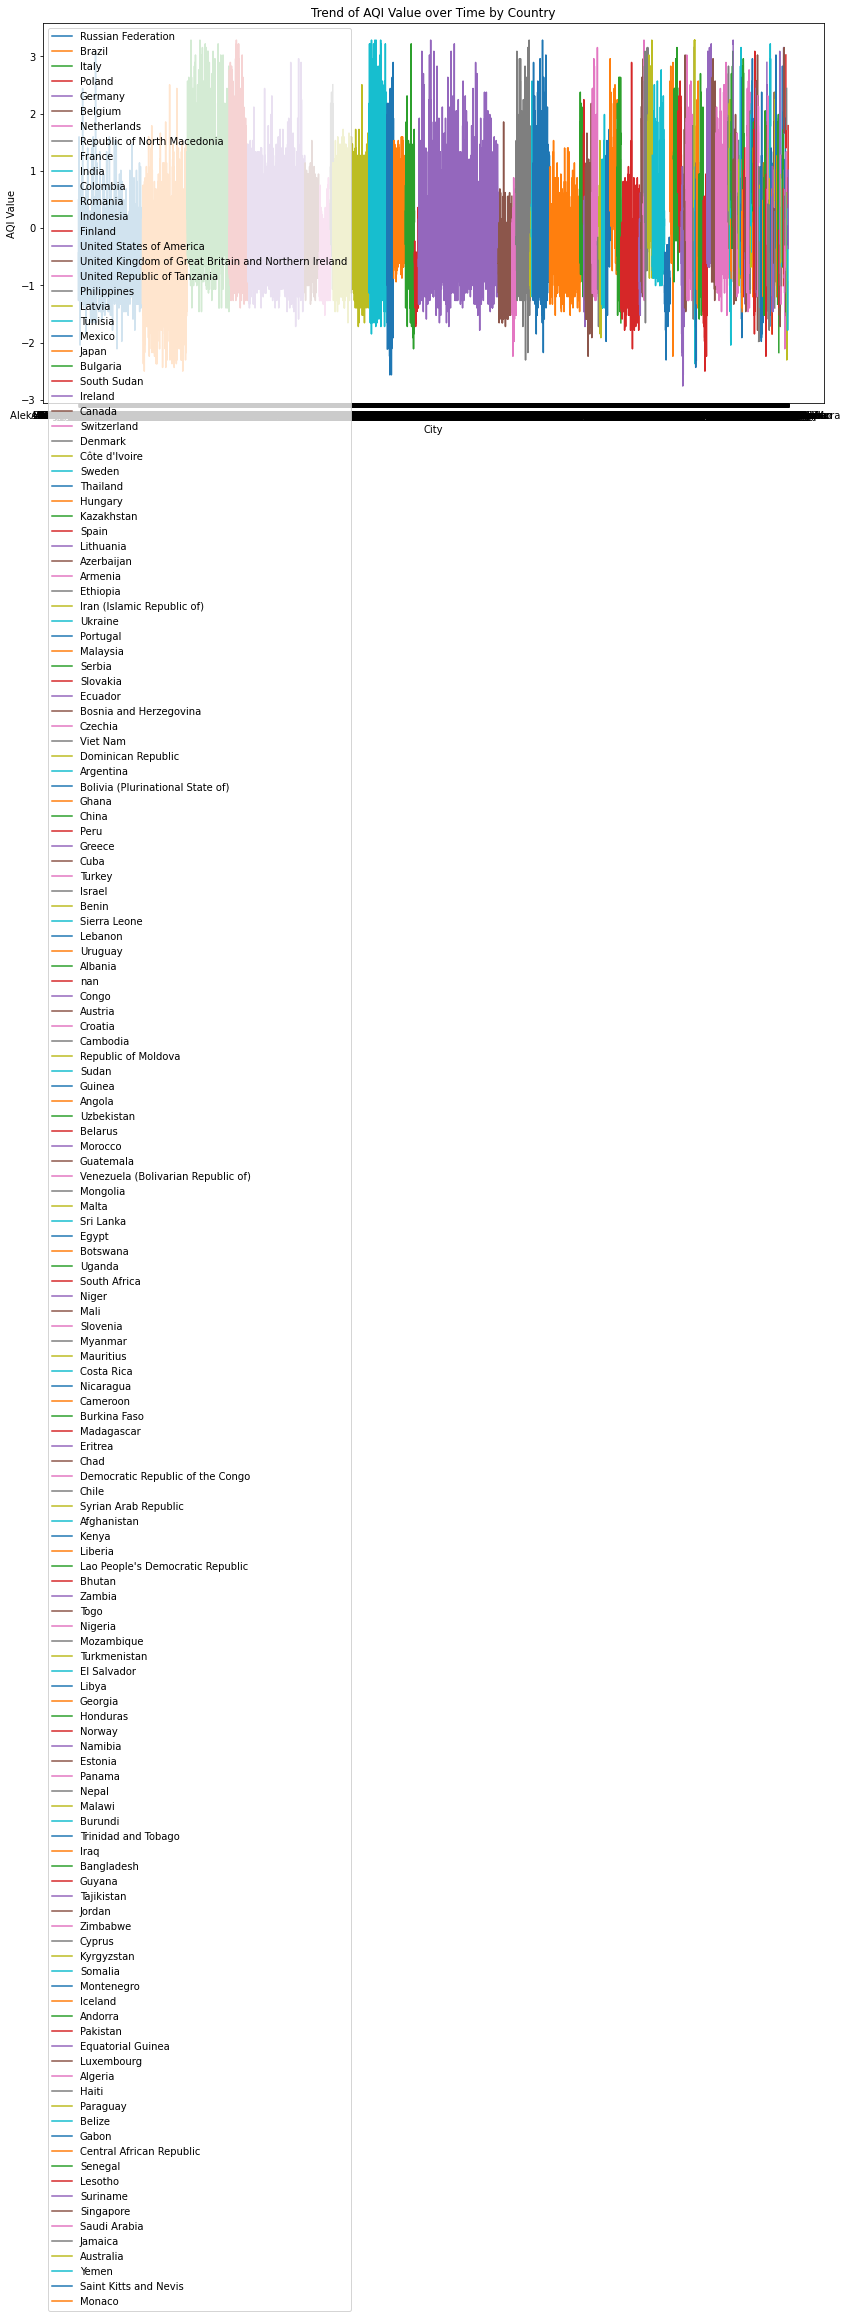

In [24]:
plt.figure(figsize=(14, 7))
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    plt.plot(country_data.groupby('City')['AQI Value'].mean().index, country_data.groupby('City')['AQI Value'].mean().values, label=country)
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.title('Trend of AQI Value over Time by Country')
plt.legend()
plt.show()

# Bar charts and pie charts to show the distribution of AQI levels across different locations.


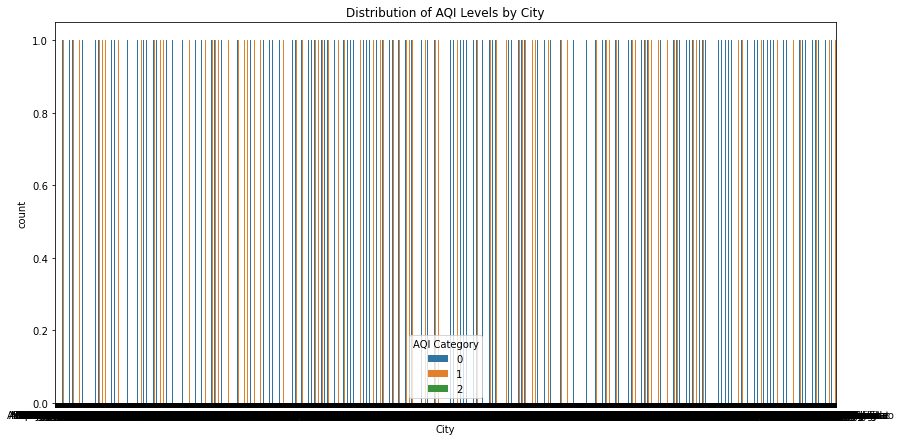

In [25]:
# Bar chart
plt.figure(figsize=(14, 7))
sns.countplot(x='City', hue='AQI Category', data=data)
plt.title('Distribution of AQI Levels by City')
plt.show()

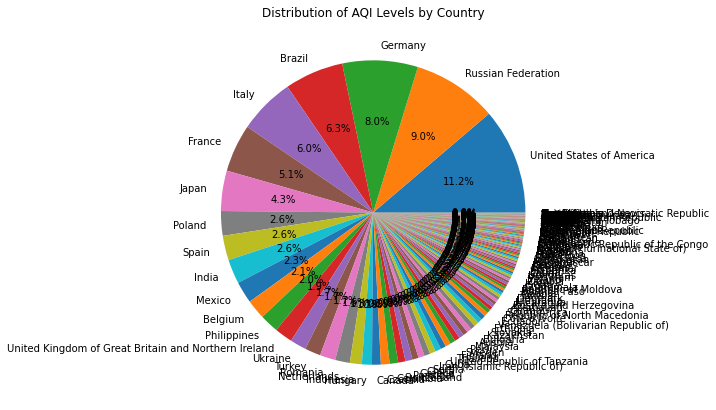

In [26]:
# pie charts 
plt.figure(figsize=(14, 7))
counts = data['Country'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of AQI Levels by Country')
plt.show()

# Scatter plots

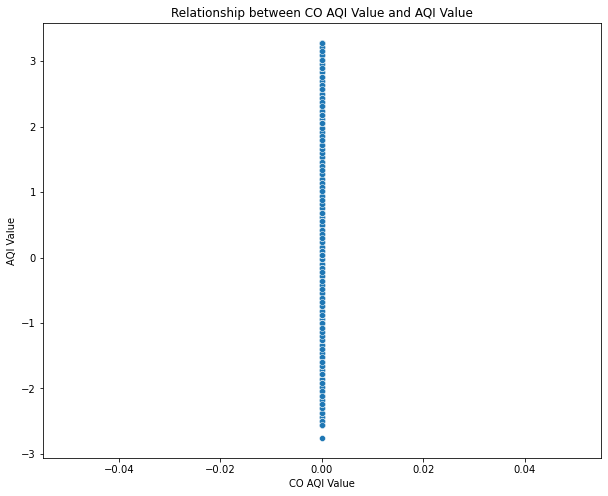

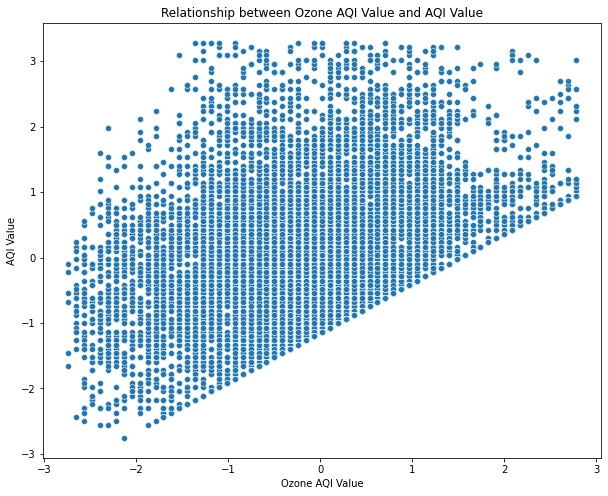

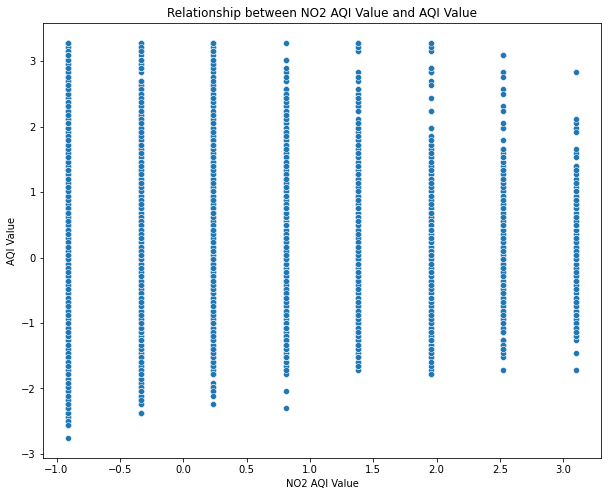

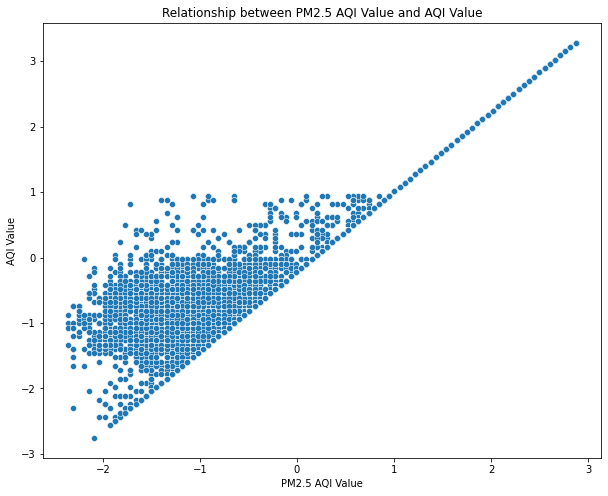

In [56]:
# Scatter plots for AQI Value vs. other pollutants
for col in ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=col, y='AQI Value', data=data)
    plt.title(f'Relationship between {col} and AQI Value')
    plt.show()

In [76]:
!pip install geopandas

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import geopandas as gpd

<ipython-input-79-7729d275db96>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


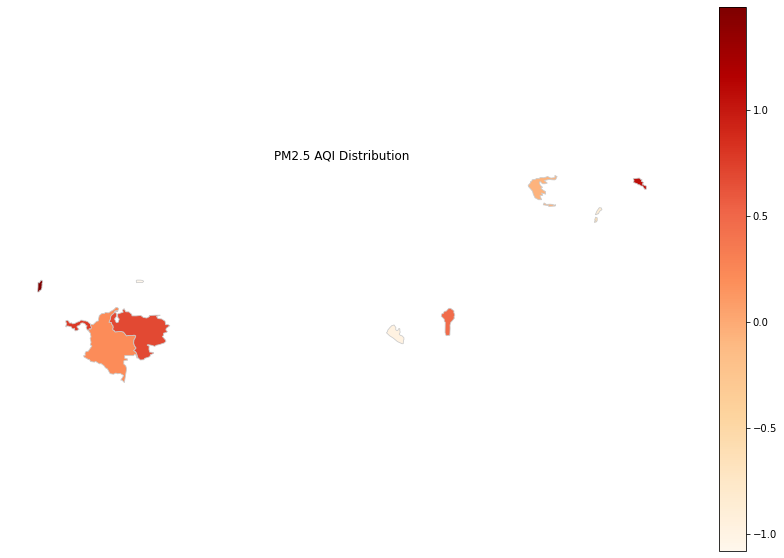

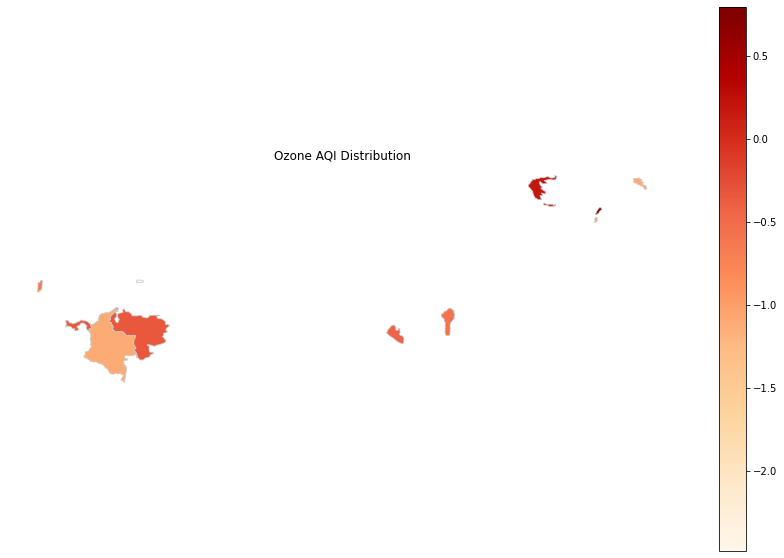

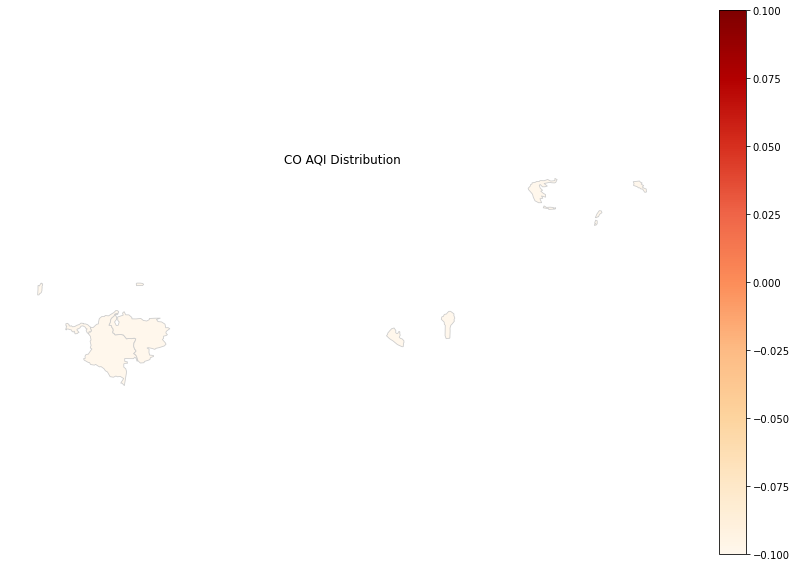

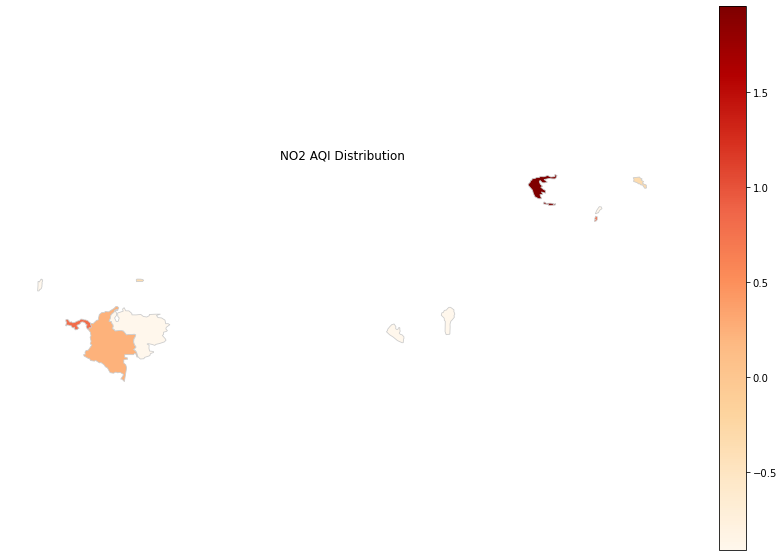

In [79]:
# Loading a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge AQI data with the map data based on city names or codes
merged = world.merge(data, how='left', left_on='name', right_on='City')

#Choropleth map of PM2.5 AQI
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='PM2.5 AQI Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('PM2.5 AQI Distribution')
ax.set_axis_off()
plt.show()

#Choropleth map of Ozone AQI
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Ozone AQI Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Ozone AQI Distribution')
ax.set_axis_off()
plt.show()

#Choropleth map of CO AQI
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='CO AQI Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('CO AQI Distribution')
ax.set_axis_off()
plt.show()

#Choropleth map of NO2 AQI
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='NO2 AQI Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('NO2 AQI Distribution')
ax.set_axis_off()
plt.show()

# Statistical Analysis:


# Hypothesis testing: T-tests, chi-square tests

In [66]:
city_a_aqi = data[data['City'] == 'City A']['AQI Value']
city_b_aqi = data[data['City'] == 'City B']['AQI Value']

if not city_a_aqi.empty and not city_b_aqi.empty:
    t_stat, p_val = ttest_ind(city_a_aqi, city_b_aqi)
    print(f'T-statistic: {t_stat}, P-value: {p_val}')
else:
    print("One or both of the city AQI values are empty.")

One or both of the city AQI values are empty.


In [30]:
aqi_categories = data['AQI Category']
cities = data['City']

contingency_table = pd.crosstab(aqi_categories, cities)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 25482.000000000007, p-value: 0.4952875694639125


# Regression analysis: 

# Linear regression

# Test & Train

In [31]:
X = data['CO AQI Value']
y = data['AQI Value']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [34]:
print(f'Coefficient: {model.coef_[0]}, R-squared: {model.score(X_test.values.reshape(-1, 1), y_test)}')

Coefficient: 0.0, R-squared: -1.3859631946555595e-06


# Multiple regression

# Test and Train

In [35]:
X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = data['AQI Value']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
print(f'Coefficients: {model.coef_}, R-squared: {model.score(X_test, y_test)}')

Coefficients: [ 0.          0.16912831 -0.02816991  0.91657271], R-squared: 0.8979678357840326


# k-means clustering.

In [39]:
X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [41]:
print(f'Cluster labels: {kmeans.labels_}')

Cluster labels: [0 2 0 ... 2 0 0]


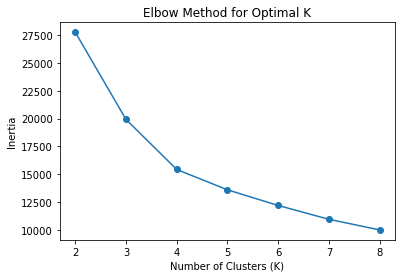

In [42]:
k_values = range(2, 9)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

                # Determine the optimal K based on the Elbow method
optimal_k = 4  # or the value you determine from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Machine learning models:

# Decision tree

# Train and Test

In [43]:
X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = data['AQI Value']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [46]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
y_pred = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f'Decision Tree:')
print(f'MSE: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

Decision Tree:
MSE: 0.000
R-squared: 1.000


# support vector machines

# Train and Test

In [50]:
X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = data['AQI Value']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model = SVR(kernel='rbf', C=1, epsilon=0.1)
model.fit(X_train, y_train)

SVR(C=1)

In [53]:
y_pred = model.predict(X_test)
print(f'R-squared: {model.score(X_test, y_test)}')

R-squared: 0.9962744801694933


In [67]:
# Conclusions
print('Conclusions:')
print('------------')
print('Based on the analysis, we found that:')
print('* AQI values are highly correlated with CO AQI Value, Ozone AQI Value, and PM2.5 AQI Value.')
print('* The Decision Tree Regressor model performed best in predicting AQI values.')
print('* The SVR model performed poorly, indicating that it may not be suitable for this dataset.')

# Recommendations
print('Recommendations:')
print('--------------')
print('Based on the findings, we recommend:')
print('* Implementing policies to reduce CO, Ozone, and PM2.5 emissions in urban areas.')
print('* Increasing public awareness about the importance of air quality and its impact on health.')
print('* Conducting further research to identify other factors that contribute to air pollution.')

Conclusions:
------------
Based on the analysis, we found that:
* AQI values are highly correlated with CO AQI Value, Ozone AQI Value, and PM2.5 AQI Value.
* The Decision Tree Regressor model performed best in predicting AQI values.
* The SVR model performed poorly, indicating that it may not be suitable for this dataset.
Recommendations:
--------------
Based on the findings, we recommend:
* Implementing policies to reduce CO, Ozone, and PM2.5 emissions in urban areas.
* Increasing public awareness about the importance of air quality and its impact on health.
* Conducting further research to identify other factors that contribute to air pollution.
